# Importing Required Liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis with **pandas profiling**

In [2]:
from pandas_profiling import ProfileReport

In [3]:
profile = ProfileReport(pd.read_csv('Reliance.csv'), explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Analysis with **Sweetviz**

In [4]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.9 MB/s eta 0:00:00


In [5]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("Reliance.csv"))
sweet_report.show_html("Sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Analysis with **Autoviz**

In [32]:
df=pd.read_csv("Reliance.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5730 non-null   object
 1   OPEN           5730 non-null   object
 2   HIGH           5730 non-null   object
 3   LOW            5730 non-null   object
 4   PREV. CLOSE    5730 non-null   object
 5   ltp            5730 non-null   object
 6   close          5730 non-null   object
 7   vwap           5730 non-null   object
 8   52W H          5730 non-null   object
 9   52W L          5730 non-null   object
 10  VOLUME         5730 non-null   object
 11  VALUE          5730 non-null   object
 12  No of trades   5730 non-null   object
dtypes: object(13)
memory usage: 582.1+ KB


In [34]:
df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,03-Jan-2000,237.5,251.7,237.5,233.05,251.7,251.7,249.37,269.0,116.05,"4,456,424","1,111,319,144.45",-
1,04-Jan-2000,258.4,271.85,251.3,251.7,271.85,271.85,263.52,269.0,116.05,"9,487,878","2,500,221,906.90",-
2,05-Jan-2000,256.65,287.9,256.65,271.85,286.75,282.5,274.79,271.85,116.05,"26,833,684","7,373,697,275.70",-
3,06-Jan-2000,289.0,300.7,289.0,282.5,293.5,294.35,295.45,287.9,116.05,"15,682,286","4,633,254,040.90",-
4,07-Jan-2000,295.0,317.9,293.0,294.35,314.5,314.55,308.91,300.7,116.05,"19,870,977","6,138,387,657.40",-


## Removing unwanted columns

In [36]:
df=df[["Date ","OPEN ","HIGH ","LOW ","close ","vwap ", "VOLUME " ]]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5730 non-null   object
 1   OPEN     5730 non-null   object
 2   HIGH     5730 non-null   object
 3   LOW      5730 non-null   object
 4   close    5730 non-null   object
 5   vwap     5730 non-null   object
 6   VOLUME   5730 non-null   object
dtypes: object(7)
memory usage: 313.5+ KB


## Correcting Datatypes

In [38]:
df["Date "]=pd.to_datetime(df["Date "])
df["OPEN "]=df["OPEN "].str.replace(",","").astype(float)
df["HIGH "]=df["HIGH "].str.replace(",","").astype(float)
df["LOW "]=df["LOW "].str.replace(",","").astype(float)
df["close "]=df["close "].str.replace(",","").astype(float)
df["vwap "]=df["vwap "].str.replace(",","").astype(float)
df["VOLUME "]=df["VOLUME "].str.replace(",","").astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5730 non-null   datetime64[ns]
 1   OPEN     5730 non-null   float64       
 2   HIGH     5730 non-null   float64       
 3   LOW      5730 non-null   float64       
 4   close    5730 non-null   float64       
 5   vwap     5730 non-null   float64       
 6   VOLUME   5730 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 313.5 KB


## Adding Day, Month and Year column for better analysis

In [40]:
df["Year"]=df["Date "].dt.year
df["Month"]=df["Date "].dt.month_name()
df["Day"]=df["Date "].dt.day_name()

In [41]:
df

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
0,2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424.0,2000,January,Monday
1,2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878.0,2000,January,Tuesday
2,2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684.0,2000,January,Wednesday
3,2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286.0,2000,January,Thursday
4,2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977.0,2000,January,Friday
...,...,...,...,...,...,...,...,...,...,...
5725,2022-12-26,2514.75,2542.00,2492.40,2524.05,2523.81,2764496.0,2022,December,Monday
5726,2022-12-27,2530.00,2548.80,2515.25,2544.70,2534.62,2659749.0,2022,December,Tuesday
5727,2022-12-28,2538.00,2549.80,2521.50,2544.45,2537.68,3442509.0,2022,December,Wednesday
5728,2022-12-29,2527.00,2548.90,2525.50,2543.30,2536.86,3198493.0,2022,December,Thursday


In [42]:
df.describe()

,OPEN,HIGH,LOW,close,vwap,VOLUME,Year
count,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5.730000e+03,5730.000000
mean,1116.482845,1131.584738,1100.035707,1115.289092,1115.923068,5.667730e+06,2010.984991
std,665.244775,674.541543,654.287192,664.168719,664.355703,4.934427e+06,6.646587
min,205.500000,219.500000,197.150000,203.200000,212.290000,5.282000e+04,2000.000000
25%,700.450000,708.462500,693.012500,699.875000,700.140000,2.923922e+06,2005.000000
50%,972.000000,983.275000,961.450000,971.075000,972.290000,4.360652e+06,2011.000000
75%,1371.037500,1388.750000,1353.275000,1370.900000,1370.490000,6.703719e+06,2017.000000
max,3298.000000,3298.000000,3141.300000,3220.850000,3197.750000,6.523089e+07,2022.000000


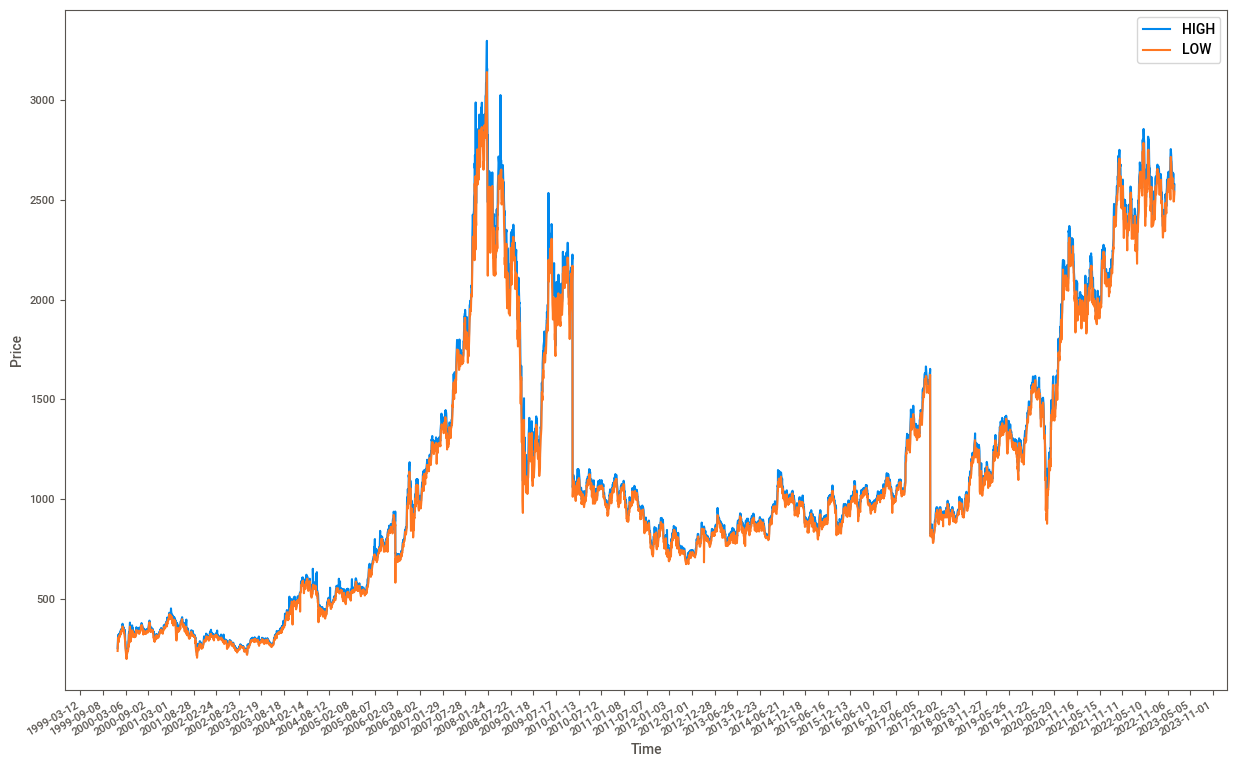

In [46]:
# Ploting opening and closing
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
x_dates=[dt.datetime.strptime(str(d)[:10],'%Y-%m-%d').date() for d in df["Date "]]

plt.plot(x_dates,df["HIGH "],label="HIGH")
plt.plot(x_dates,df["LOW "],label="LOW")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

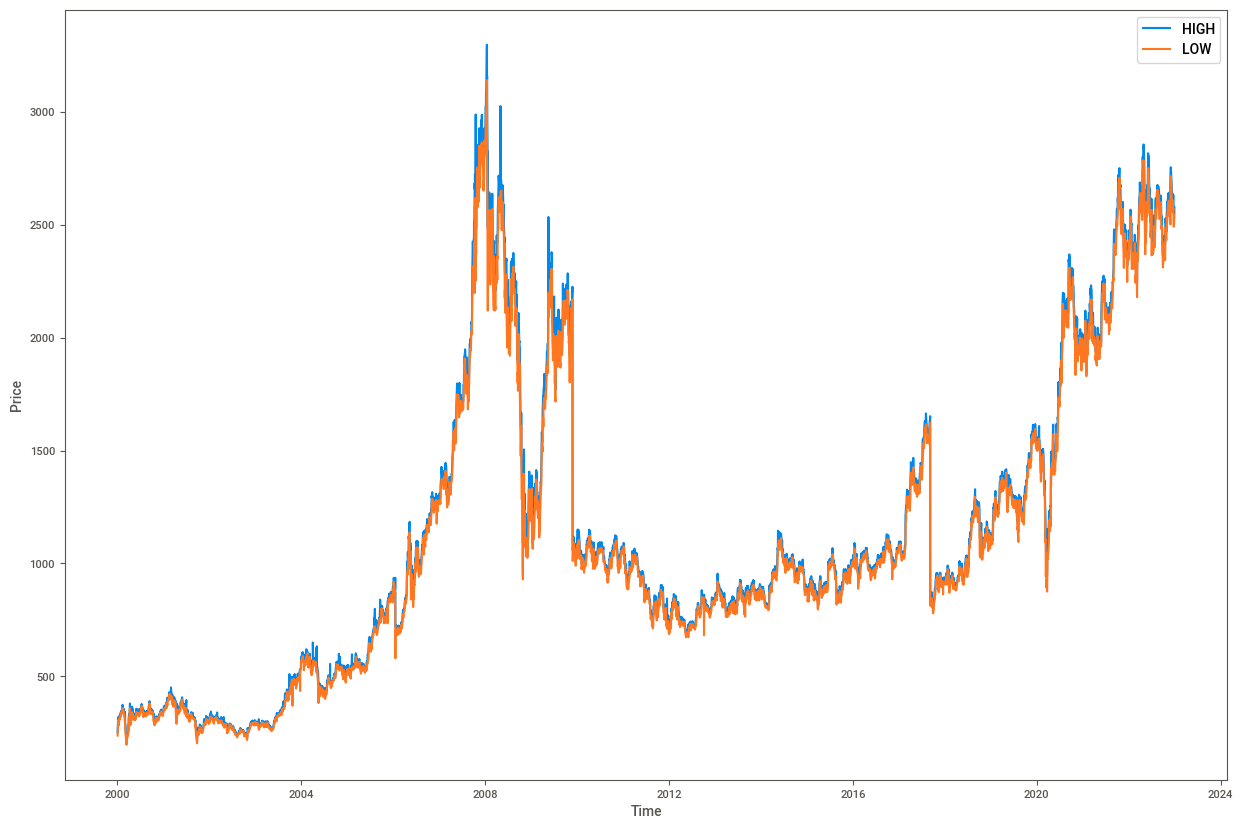

In [60]:
plt.figure(figsize=(15,10))
plt.plot(x_dates,df["HIGH "],label="HIGH")
plt.plot(x_dates,df["LOW "],label="LOW")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

<Axes: ylabel='Day'>

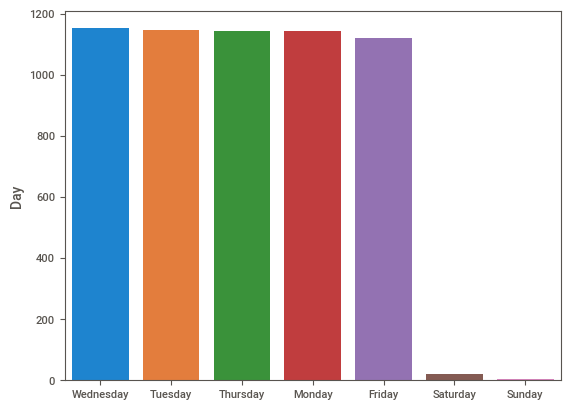

In [78]:
sns.barplot(x=df.Day.value_counts().index, y=df.Day.value_counts())

#  <span style="color: red;">Analysis on Market opening data on monthly level</span>  

In [47]:
df_open_mean_month=pd.pivot_table(df,index="Year",columns="Month",values="OPEN ",aggfunc="mean",sort=False)

In [49]:
df_open_mean_month.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2000,329.241667,335.170455,339.072500,345.230952,304.955000,352.497619,338.152273,256.011905,323.904545,314.240909,317.438095,357.305000
2001,350.150000,321.383333,307.542105,405.737500,364.675000,326.250000,360.300000,399.685714,367.893182,278.185000,264.111905,271.352500
2002,295.213636,245.123810,294.340476,311.502500,317.189130,261.428261,279.340000,306.023684,278.745455,271.797368,239.650000,260.102500
2003,282.450000,369.777500,503.995455,288.065789,290.282609,336.723913,313.390476,284.825000,270.995238,477.507500,464.734783,421.159091
2004,567.017500,481.215909,512.689130,579.984211,578.209524,442.365909,438.977273,547.640909,481.852381,535.415000,549.142500,491.315909


<Axes: xlabel='Year'>

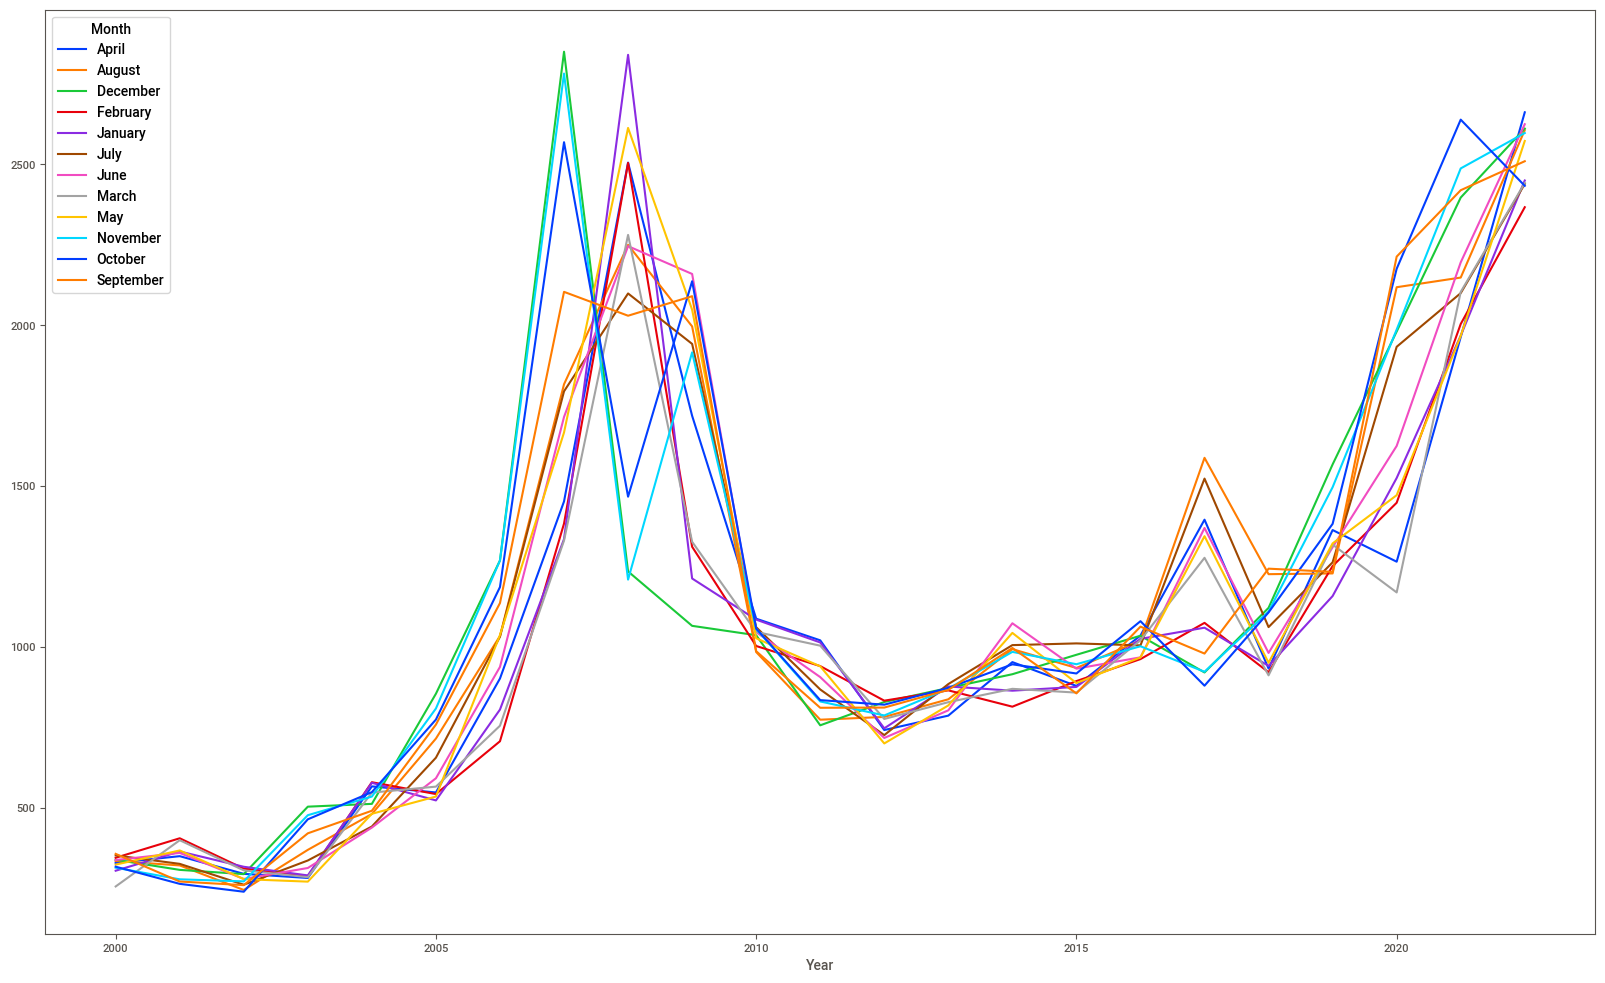

In [50]:
plt.figure(figsize=(20,12))
sns.lineplot(data=df_open_mean_month,palette="bright",dashes=False)

# Insight:
## As we can see after 2015, August and October there share price has been maximum. Investment before August and October would be more profitable

<Axes: xlabel='Year', ylabel='December'>

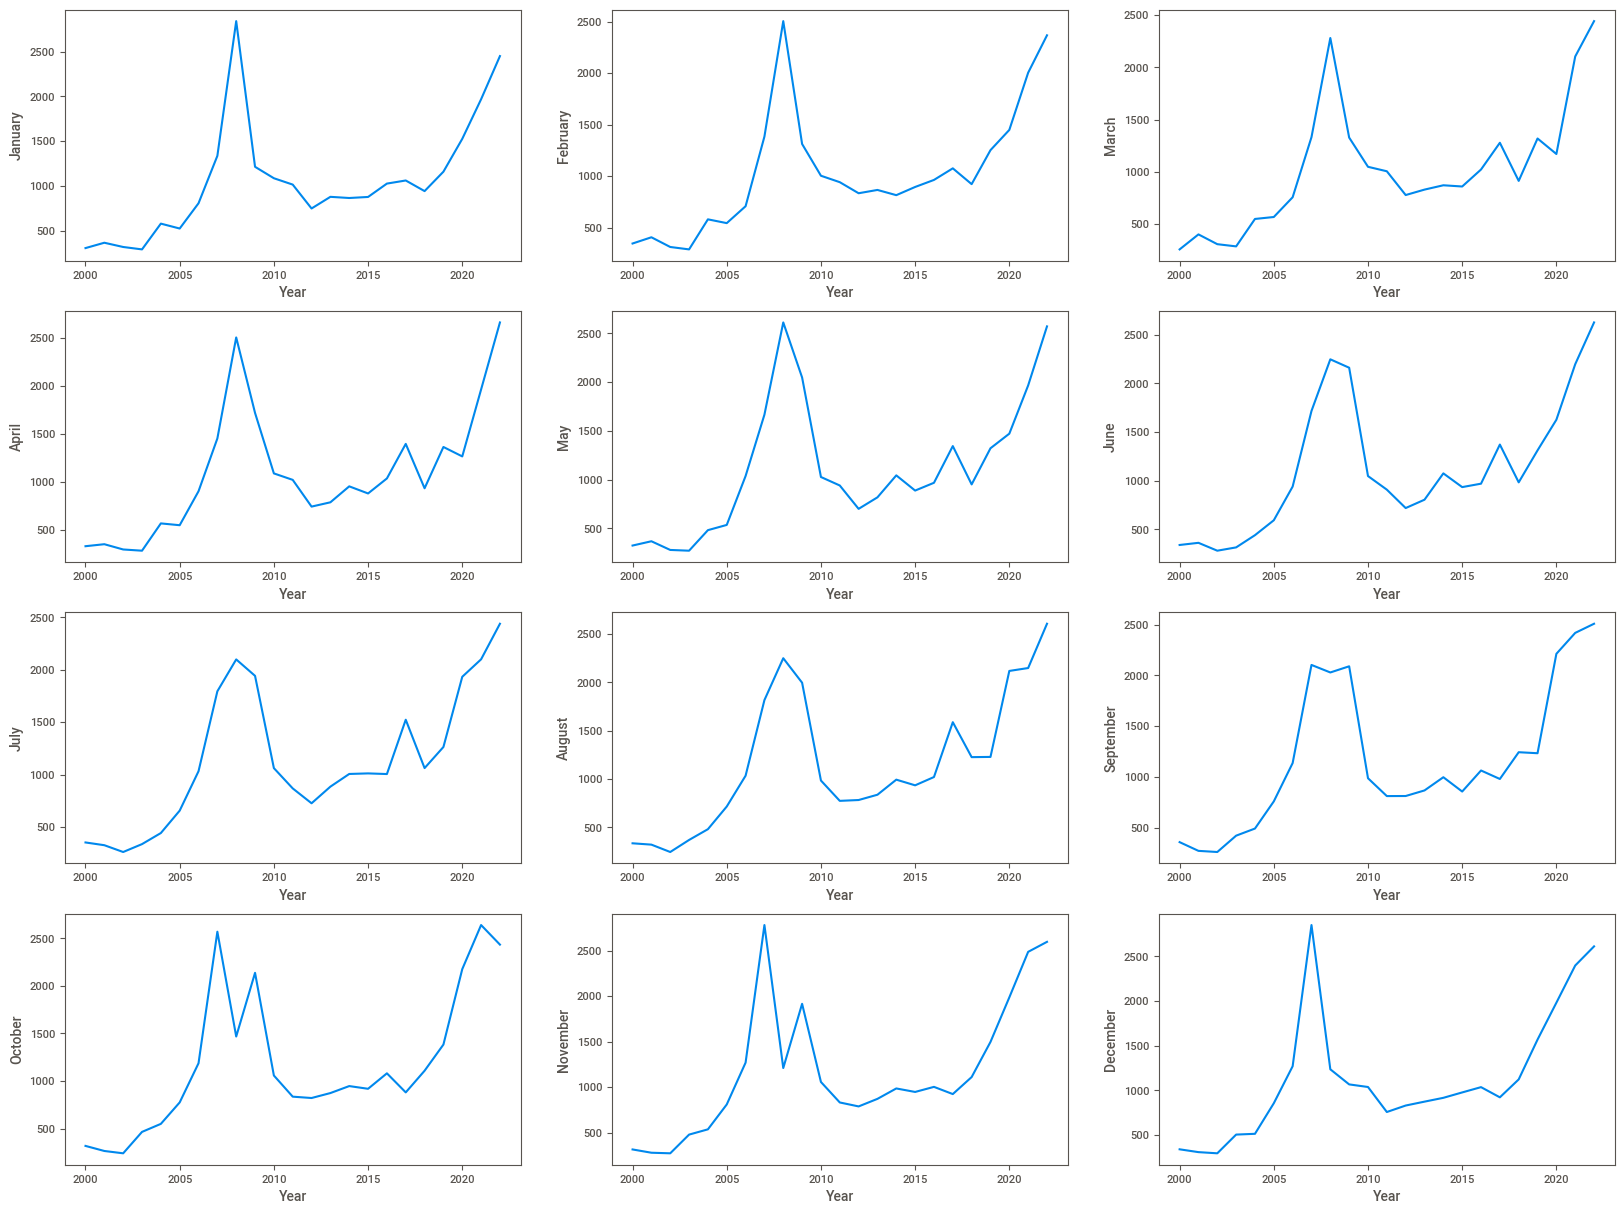

In [61]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15)) 
sns.lineplot(data=df_open_mean_month["January"],ax=axes[0, 0])
sns.lineplot(data=df_open_mean_month["February"],ax=axes[0, 1])
sns.lineplot(data=df_open_mean_month["March"],ax=axes[0, 2])
sns.lineplot(data=df_open_mean_month["April"],ax=axes[1, 0])
sns.lineplot(data=df_open_mean_month["May"],ax=axes[1, 1])
sns.lineplot(data=df_open_mean_month["June"],ax=axes[1, 2])
sns.lineplot(data=df_open_mean_month["July"],ax=axes[2, 0])
sns.lineplot(data=df_open_mean_month["August"],ax=axes[2, 1])
sns.lineplot(data=df_open_mean_month["September"],ax=axes[2, 2])
sns.lineplot(data=df_open_mean_month["October"],ax=axes[3, 0])
sns.lineplot(data=df_open_mean_month["November"],ax=axes[3, 1])
sns.lineplot(data=df_open_mean_month["December"],ax=axes[3, 2])


# Insight:  
## As we can see most of the higher peaks after 2015 are in month of April to Auguest, reason behind this may be that it is the starting of new financial year. Investing and holding between `April to August` month might give more profits.

In [63]:
df[df["OPEN "]==max(df["OPEN "])]

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
2017,2008-01-15,3298.0,3298.0,3141.3,3165.55,3194.46,3798648.0,2008,January,Tuesday


In [64]:
df[df["OPEN "]==min(df["OPEN "])]

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
50,2000-03-14,205.5,219.5,197.15,219.2,212.29,10106318.0,2000,March,Tuesday


# Insight: 
## Maximum price was `3298 in January-2008` and Minimum was `205 in March-2000`

In [65]:
df[df["OPEN "]==np.median(df["OPEN "])]

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
1603,2006-05-24,972.0,972.0,865.00,938.55,944.38,11456992.0,2006,May,Wednesday
2670,2010-09-13,972.0,995.5,965.35,992.50,980.81,6280165.0,2010,September,Monday
4108,2016-06-30,972.0,977.5,967.05,969.15,971.01,2916329.0,2016,June,Thursday


# Insight: 
## Average share opening price over the years has been around 972 and in years 2006, 2010 and 2016. Hence any price around it would be an ideal buying price for an investor.

#  <span style="color: red;">Analysis on Market Volume data on Day level</span>  

In [55]:
df_vol_mean_day=pd.pivot_table(df,index="Year",columns="Day",values="VOLUME ",aggfunc="mean",sort=False)

In [56]:
df_vol_mean_day

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2000,6.691547e+06,6.838439e+06,NaN,NaN,7.715767e+06,6.424648e+06,7.203564e+06
2001,3.942324e+06,3.638478e+06,NaN,NaN,4.389987e+06,3.683897e+06,3.893334e+06
2002,3.554911e+06,3.037244e+06,NaN,NaN,3.798854e+06,3.003778e+06,2.905875e+06
2003,5.662437e+06,4.793358e+06,1.257692e+06,NaN,5.743397e+06,5.236191e+06,5.002685e+06
2004,6.570749e+06,6.986666e+06,7.318615e+05,NaN,7.407007e+06,6.780321e+06,6.571917e+06
2005,5.677779e+06,5.048225e+06,2.413169e+06,NaN,6.102659e+06,5.397447e+06,6.300321e+06
2006,4.907645e+06,4.569331e+06,9.212000e+05,835543.0,5.889912e+06,5.658724e+06,6.372172e+06
2007,3.226039e+06,2.592549e+06,NaN,NaN,3.020040e+06,2.738778e+06,3.047927e+06
2008,4.938237e+06,4.382513e+06,NaN,NaN,4.736025e+06,4.093523e+06,4.486375e+06


In [57]:
## As on SATURDAY and SUNDAY Markets are closed ,we will remove those columns
df_vol_mean_day.drop(columns=["Saturday","Sunday"],inplace=True)

Text(0, 0.5, 'Volumes')

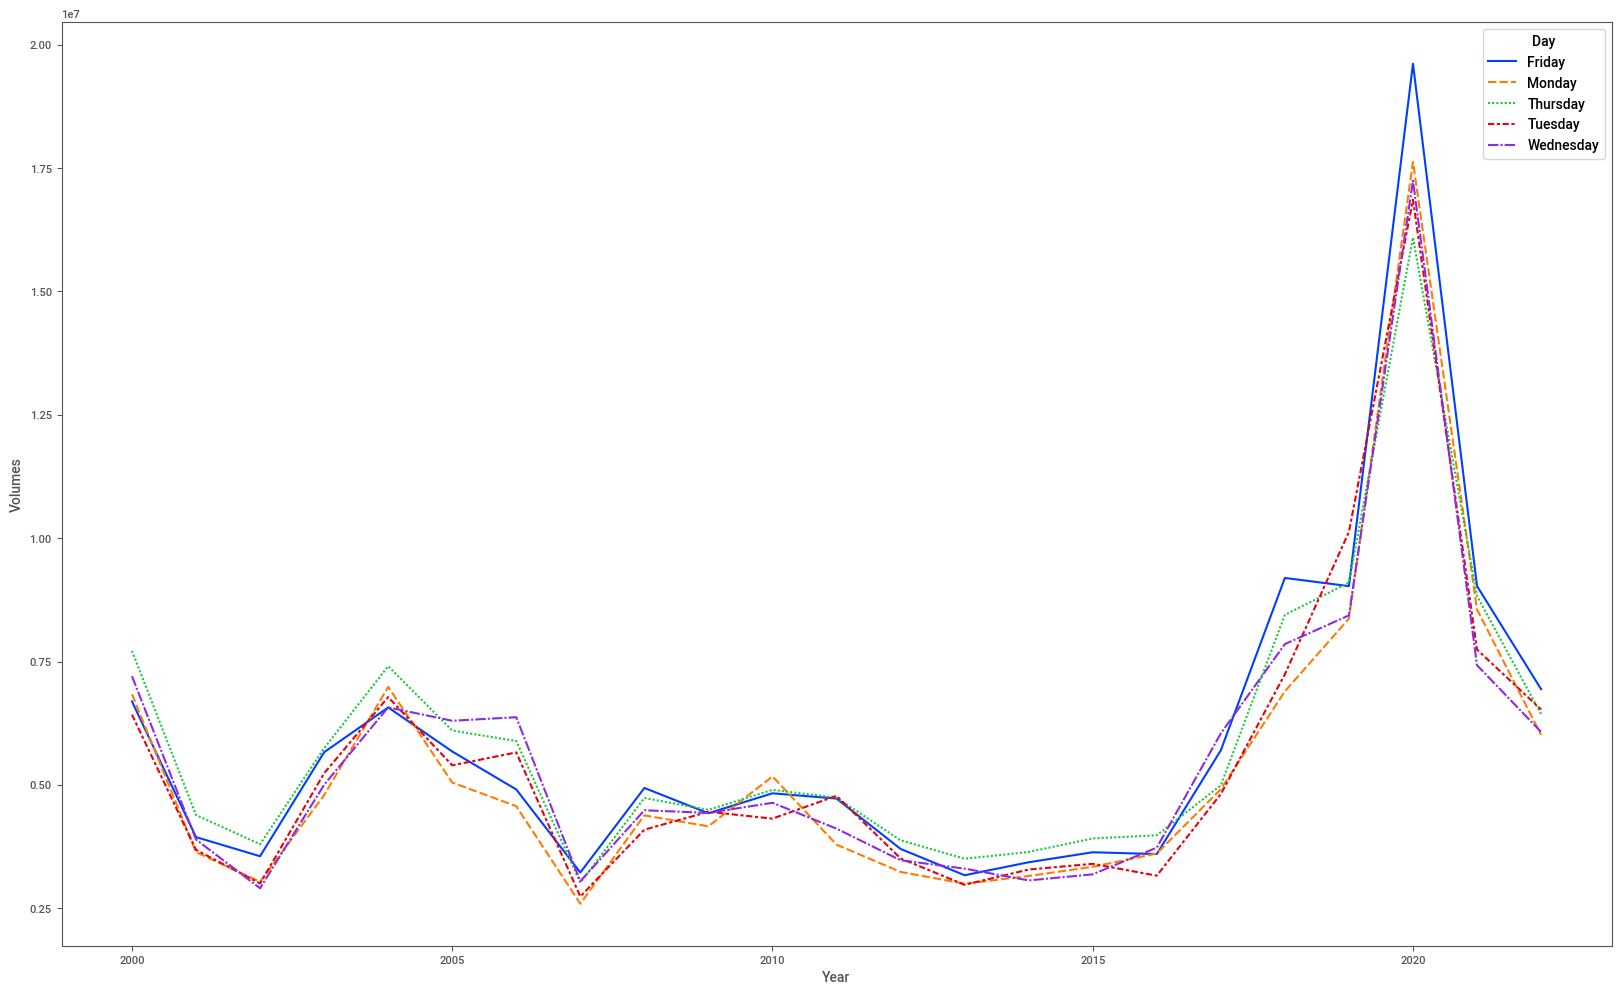

In [67]:
plt.figure(figsize=(20,12))
sns.lineplot(data=df_vol_mean_day,palette="bright")
plt.ylabel("Volumes")

# Insight:
## After 2015 maximum volumes were on Friday. Hence, a big investor investing in huge quantity must trade on `Friday`. 